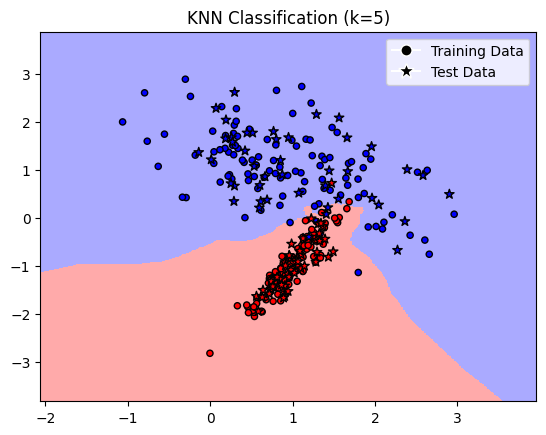

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Generate a classification dataset with 2 features (for 2D visualization)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Visualize the results with a color map
h = .02  # Step size in the mesh

# Create a mesh grid to draw the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the classification for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Light red for class 0, light blue for class 1
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # Red for class 0, blue for class 1

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label="Training Data")

# Plot the testing points (with larger markers)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='*', label="Test Data")

# Fix the legend to clarify the distinction between training and test data
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Training Data'),
           plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='k', markersize=12, label='Test Data')]

plt.legend(handles=handles)
plt.title("KNN Classification (k=5)")
plt.show()


In [3]:
print("Test set predictions:", knn.predict(X_test))

Test set predictions: [0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0]


In [4]:
print("Test set accuarcy:{:.2f}".format(knn.score(X_test, y_test)))

Test set accuarcy:0.96
